Importer les librairies utiles  COMMENCER PAR PLOT LES DONNEES POUR VOIR UNE TENDANCE

In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

Récupérer le fichier csv au travers d'un data frame

In [3]:
dataset = pd.DataFrame.df = pd.read_csv("crime-in-france.csv")
dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_10,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01
0,1,Règlements de compte entre malfaireurs,8,9,8,8,2,14,15,10,...,8,8,6,5,12,5,2,9,5,11
1,2,Homicides pour voler et à l'occasion de vols,3,2,4,4,6,2,4,6,...,3,4,9,5,4,4,7,6,5,2
2,3,Homicides pour d'autres motifs,67,75,55,52,76,56,51,61,...,84,82,74,75,62,77,76,70,96,60
3,4,Tentatives d'homicides pour voler et à l'occas...,6,5,6,12,4,13,5,24,...,14,5,8,10,14,14,5,9,10,7
4,5,Tentatives homicides pour d'autres motifs,218,238,224,200,208,228,168,165,...,87,95,68,101,85,106,63,104,91,65


Sommes des crimes sur la période (ajout d'une colonne au df)

In [4]:
dataset["somme"] = dataset.iloc[: ,2: ].sum(axis=1)
dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
0,1,Règlements de compte entre malfaireurs,8,9,8,8,2,14,15,10,...,8,6,5,12,5,2,9,5,11,1574
1,2,Homicides pour voler et à l'occasion de vols,3,2,4,4,6,2,4,6,...,4,9,5,4,4,7,6,5,2,795
2,3,Homicides pour d'autres motifs,67,75,55,52,76,56,51,61,...,82,74,75,62,77,76,70,96,60,13854
3,4,Tentatives d'homicides pour voler et à l'occas...,6,5,6,12,4,13,5,24,...,5,8,10,14,14,5,9,10,7,1553
4,5,Tentatives homicides pour d'autres motifs,218,238,224,200,208,228,168,165,...,95,68,101,85,106,63,104,91,65,24245


Récupérer les 10 crimes les plus commis

In [120]:
sort_dataset = dataset.sort_values(by='somme', ascending=False).head(5)
sort_dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
36,37,Vols à la roulotte,23135,24294,22743,23445,22102,23477,21041,21960,...,39978,44851,45358,43968,44021,37313,38870,35878,33934,6097728
42,43,Autres vols simples contre des particuliers da...,33242,35740,35469,32424,29449,32478,27775,28452,...,23844,27372,25918,26234,25927,21608,25374,23216,22508,6048140
41,42,Autres vols simples contre des particuliers da...,19376,19838,19567,18045,16311,17303,14758,15482,...,16163,18179,17266,17435,16837,13999,15784,14177,13641,3638904
67,68,Destructions et dégradations de véhicules privés,6979,7494,7543,7794,7187,7891,6536,6920,...,22232,20964,24105,25200,25992,22118,25423,22395,21676,3573429
26,27,Cambriolages de locaux d'habitations principales,21013,19060,17048,17337,17184,19808,18716,20975,...,13785,16264,13731,13794,14044,11926,14056,13217,14073,3494742


PLOT LES DONNEES 

5


,Libellé index,2000_12,2000_11,2000_10,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01
36,Vols à la roulotte,39399,42984,45252,39978,44851,45358,43968,44021,37313,38870,35878,33934
42,Autres vols simples contre des particuliers da...,23946,24623,26641,23844,27372,25918,26234,25927,21608,25374,23216,22508
41,Autres vols simples contre des particuliers da...,15677,15633,16504,16163,18179,17266,17435,16837,13999,15784,14177,13641
67,Destructions et dégradations de véhicules privés,23614,25735,26122,22232,20964,24105,25200,25992,22118,25423,22395,21676
26,Cambriolages de locaux d'habitations principales,16147,15430,14481,13785,16264,13731,13794,14044,11926,14056,13217,14073


5


,Libellé index,2001_12,2001_11,2001_10,2001_09,2001_08,2001_07,2001_06,2001_05,2001_04,2001_03,2001_02,2001_01
36,Vols à la roulotte,39813,44763,48857,42164,45411,48376,45676,44805,42491,41531,38420,39324
42,Autres vols simples contre des particuliers da...,23368,24489,26749,22829,28114,28412,27128,26056,24164,26704,23290,25253
41,Autres vols simples contre des particuliers da...,14707,16530,18403,16148,19769,19841,18667,17072,15686,16639,14858,15264
67,Destructions et dégradations de véhicules privés,25322,26961,29172,23610,22727,26177,26819,27212,25533,27131,24815,26413
26,Cambriolages de locaux d'habitations principales,17767,17087,16255,14880,18010,16111,14995,15482,15196,15947,14338,16929


5


,Libellé index,2002_12,2002_11,2002_10,2002_09,2002_08,2002_07,2002_06,2002_05,2002_04,2002_03,2002_02,2002_01
36,Vols à la roulotte,39031,39140,42820,39509,40353,45191,40381,45934,43959,42300,40176,39812
42,Autres vols simples contre des particuliers da...,26314,24639,27138,24097,25454,28783,26471,25913,25071,26842,24130,25810
41,Autres vols simples contre des particuliers da...,16787,16350,17701,16758,18779,20252,18237,18256,17230,16999,15816,16077
67,Destructions et dégradations de véhicules privés,24854,24423,26866,23809,21164,25315,24738,27915,28771,27572,26372,27648
26,Cambriolages de locaux d'habitations principales,18144,16338,16379,15322,17783,17555,15829,17361,17030,16710,15928,18727


5


,Libellé index,2003_12,2003_11,2003_10,2003_09,2003_08,2003_07,2003_06,2003_05,2003_04,2003_03,2003_02,2003_01
36,Vols à la roulotte,35308,34947,39695,37997,35713,43031,40412,40276,37225,36443,32581,35627
42,Autres vols simples contre des particuliers da...,27594,25321,28902,28255,31086,32668,32289,27860,27631,28499,25725,26868
41,Autres vols simples contre des particuliers da...,16584,15566,17799,18066,20218,21915,20955,18884,17874,17876,16104,16774
67,Destructions et dégradations de véhicules privés,22860,21806,23437,22298,18523,24066,25087,25114,24427,25392,22165,24130
26,Cambriolages de locaux d'habitations principales,18296,16396,16932,17213,17446,18442,16255,15907,15527,16446,15136,17174


5


,Libellé index,2004_12,2004_11,2004_10,2004_09,2004_08,2004_07,2004_06,2004_05,2004_04,2004_03,2004_02,2004_01
36,Vols à la roulotte,32369,33106,32851,34298,33985,37442,38590,33514,33081,33589,30528,31429
42,Autres vols simples contre des particuliers da...,30724,28132,30061,30602,32133,32114,33466,27879,27680,29923,26881,27644
41,Autres vols simples contre des particuliers da...,17466,16320,17344,18636,19995,19988,20449,16890,17231,17781,16199,16091
67,Destructions et dégradations de véhicules privés,23189,22247,21688,21333,18627,21099,23698,20627,22100,23521,21910,22687
26,Cambriolages de locaux d'habitations principales,18138,15493,14887,15315,16312,15785,16154,13987,15022,16678,14756,17375


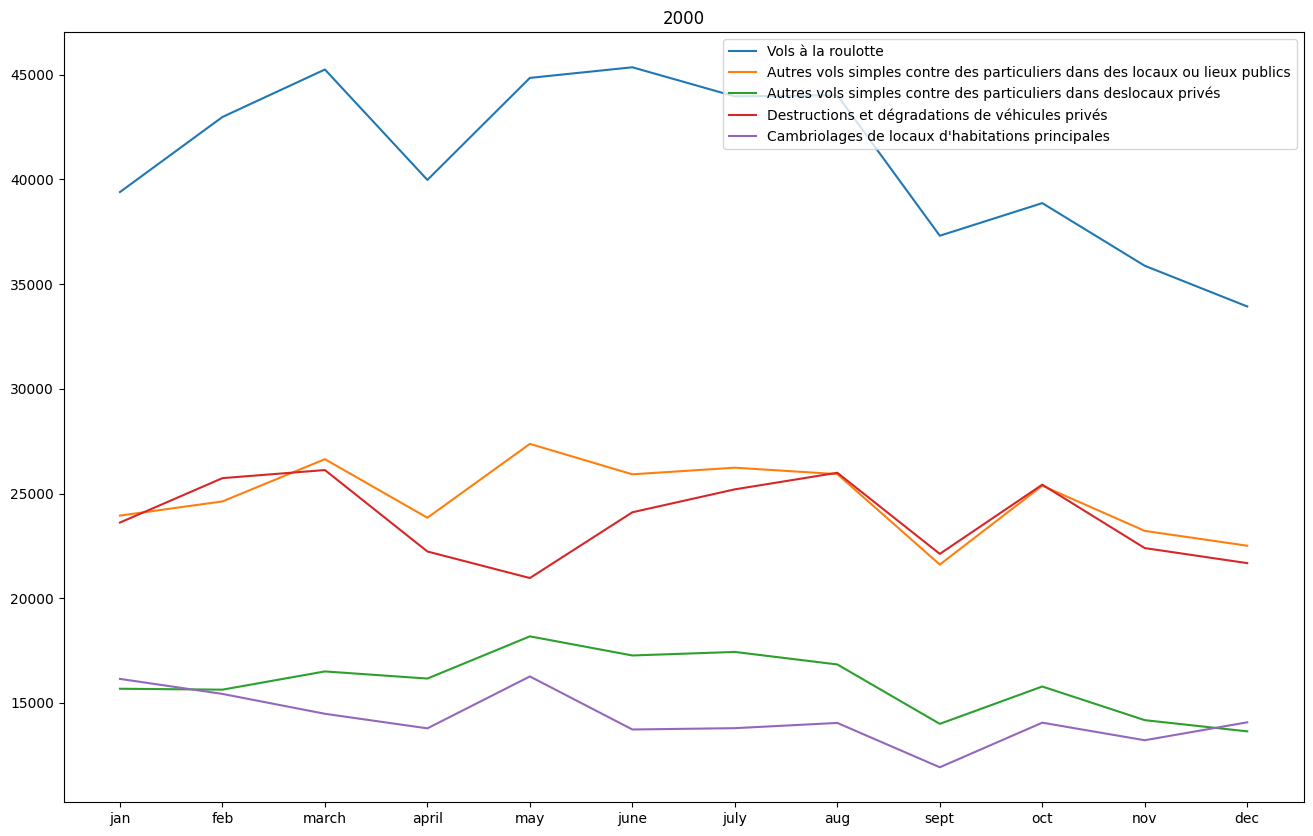

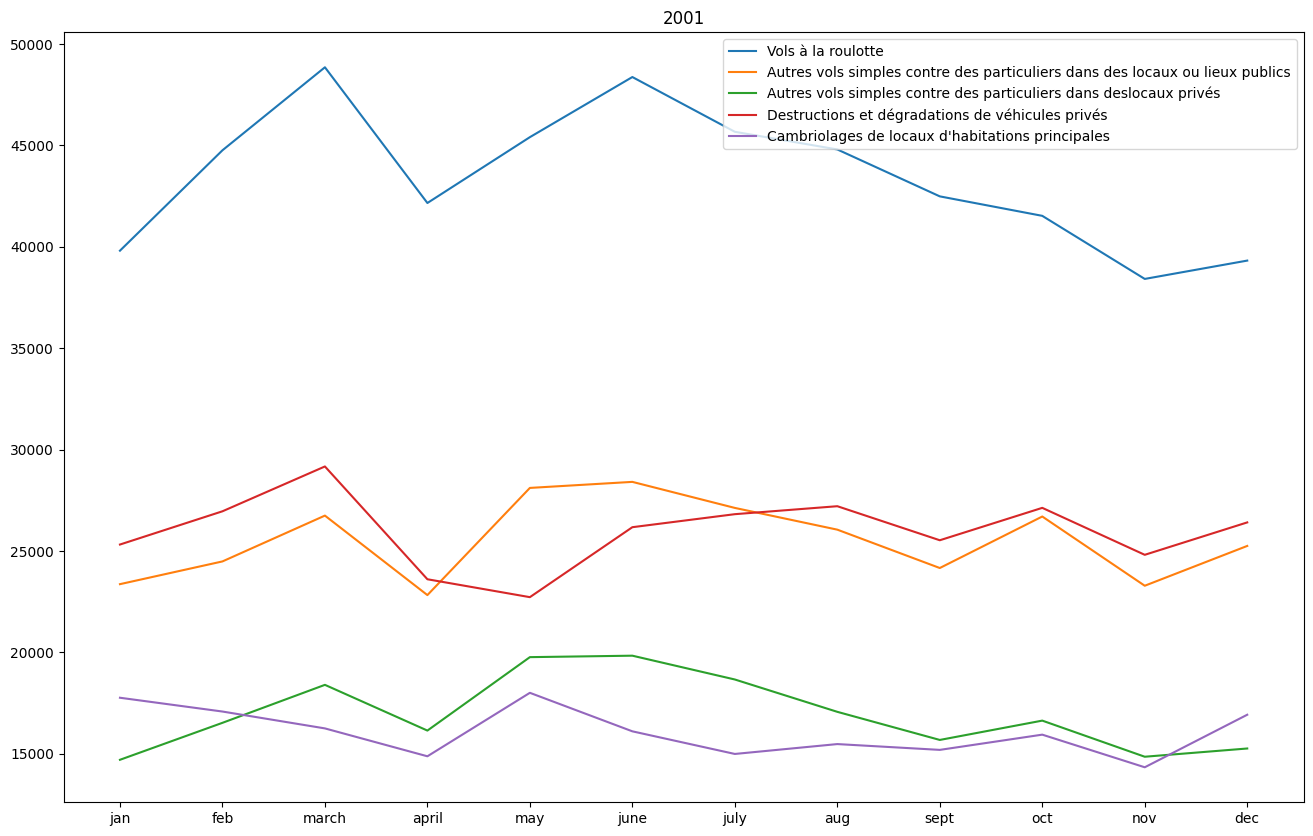

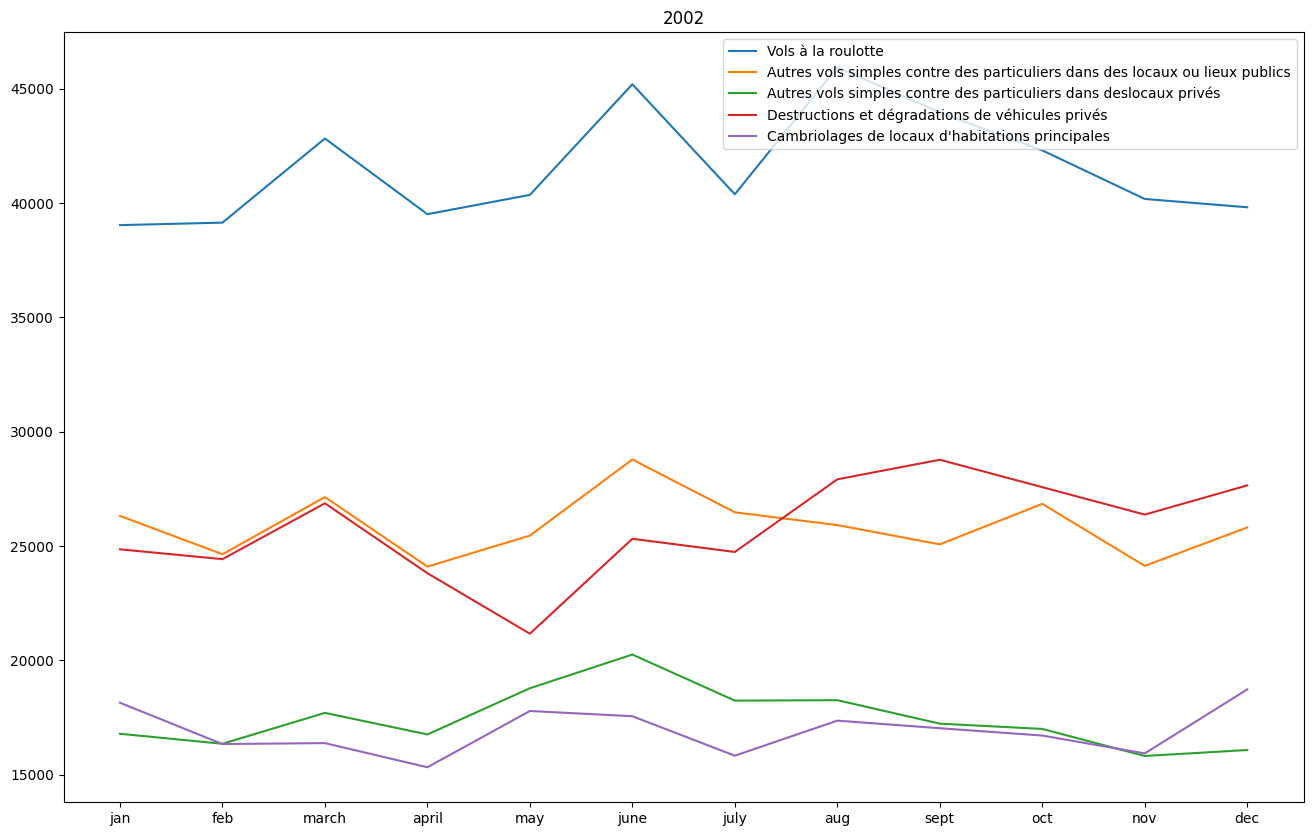

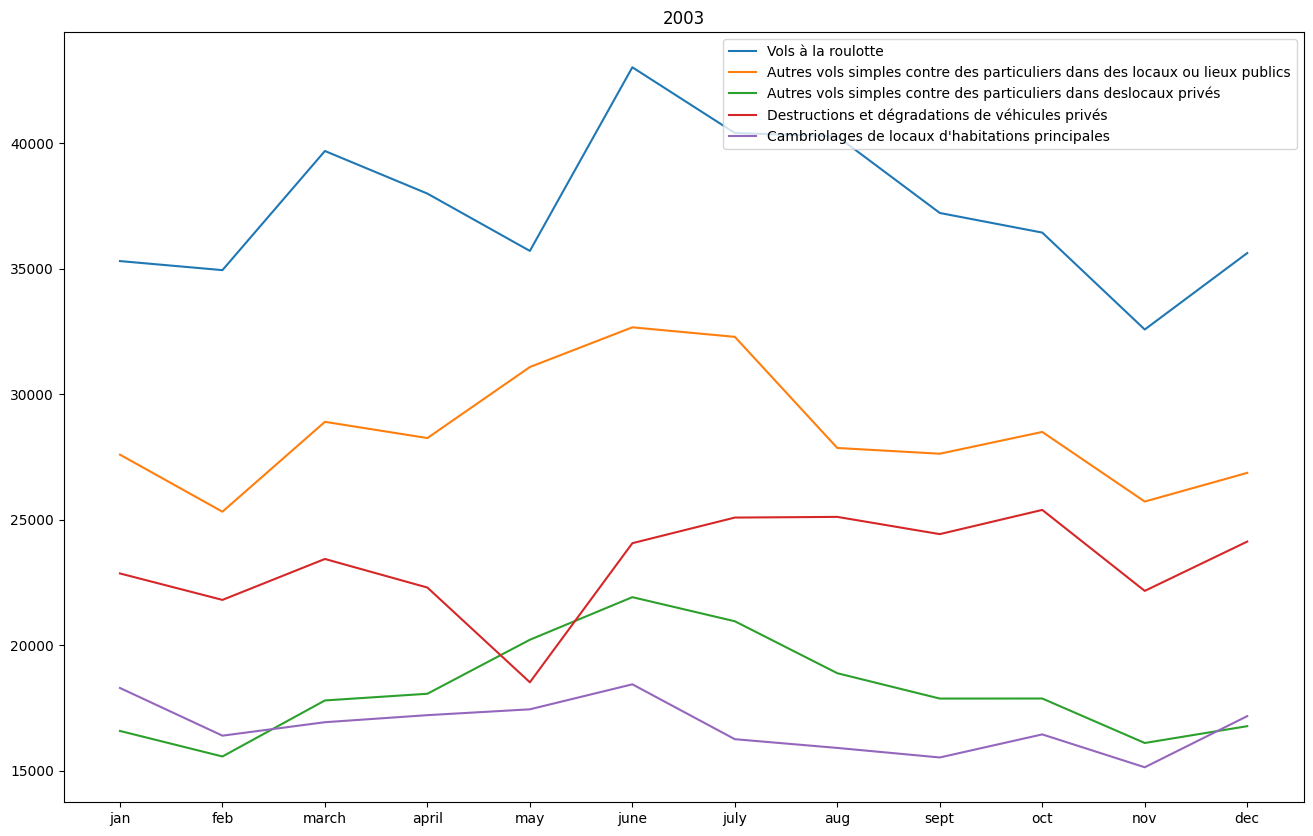

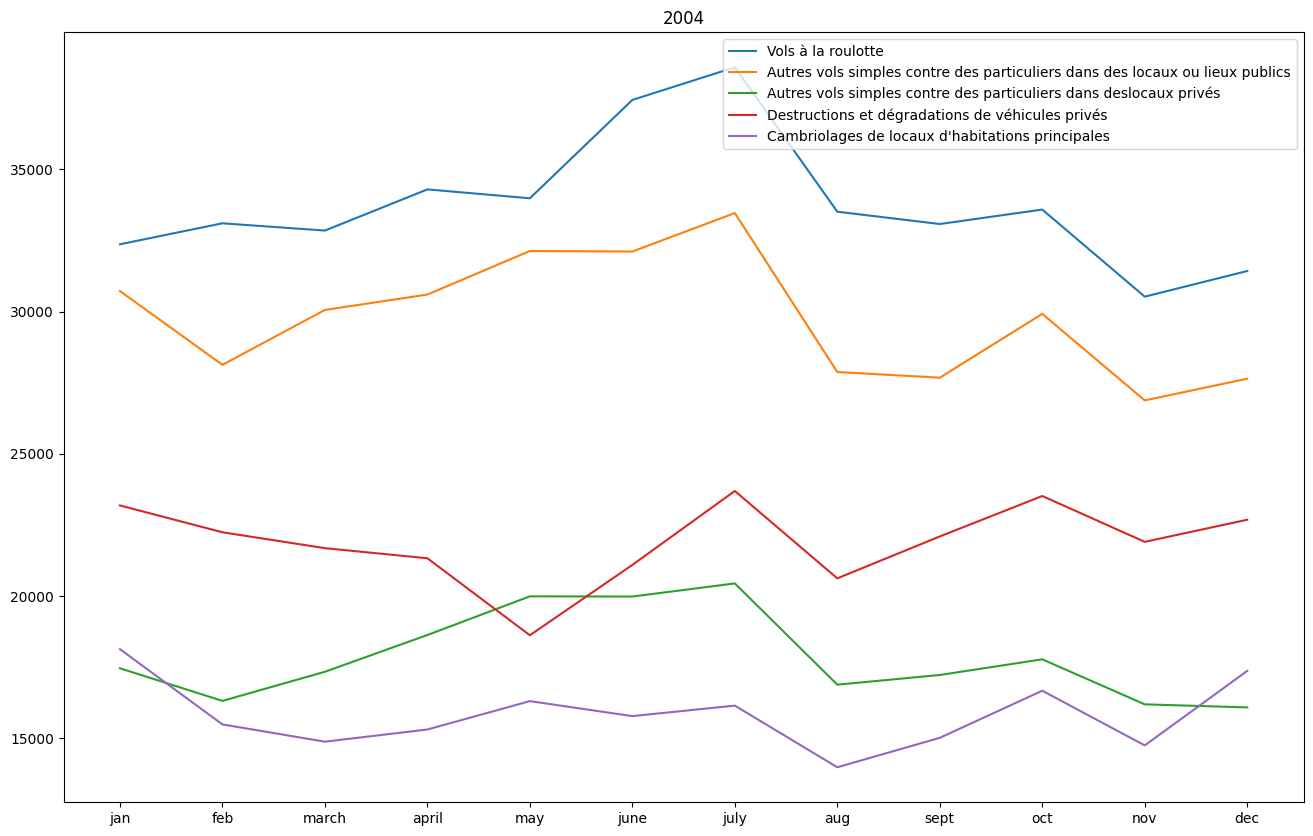

In [122]:
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']



for years in range(2000, 2005) : 
    ds_years  = sort_dataset.iloc[:5, :-1].filter(like=str(years))
    ds_years = pd.concat([sort_dataset['Libellé index'], ds_years], axis = 1)
    print(len(ds_years))
    display(ds_years.head())
    plt.figure(figsize=(16,10))
    for i in range(len(ds_years)) :
        plt.plot(months, ds_years.iloc[i, 1:], label = f'{ds_years.iloc[i,0]}')
        plt.title(f'{years}')
        plt.legend(loc='upper right')


